## Project Name: Mobile Price range Classification 
The main aim of this project is to predict the price range of the smartphones based on the different features.It is a classification problem so we are not predicting the price of the smartphone inspite we have to predict the price range of the smartphone in which the phone falls.
       

## All the Lifecycle In A Data Science Project

# 1. Life cycle: Data Gathering 

In [35]:
## Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import plotly.express as px
%matplotlib inline

#To display all the columns of a dataframe
pd.pandas.set_option("display.max_columns",None)

In [36]:
# Reading the dataset and displaying the top 5 records

df=pd.read_csv(r"C:\Users\Ram Baldotra\Downloads\TCS Internship Dataset\train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [37]:
# Displaying how may rows and columns are there in my dataset

df.shape

(2000, 21)

In [38]:
df.price_range.unique()

# As output variable has discrete(categorical) values, so it a Classification problem.

array([1, 2, 3, 0], dtype=int64)

## The price_range output variable has four values : 0,1,2,3
### 0 - indicating the lowest price_range
### 3 - indicating the highest price_range

# 2. Life cycle: Data Analysis

### The main aim of performing Data analysis is to understand more about the data

### In Data Analysis We will Analyze To Find out the below stuff

## Missing Values

In [39]:
df.isnull().sum()

## We have no missing values in our data set.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [40]:
df.info()

## Finding out some more information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [41]:
## It shows that we don't have any text categorical variable in our dataset.           

### Numerical Variables

In [42]:
## Counting the numerical features

col_type=["int64","float64"]
features=[feature for feature in df.columns if df[feature].dtype in col_type]

print("Total number of numerical variables : ",len(features))

## All 21 features in our dataset are numerical features

Total number of numerical variables :  21


In [43]:
## Numericalvariables are usually of 2 types
## 1. Continuous variables 2. Discrete variables

discrete_features=[feature for feature in df.columns if len(df[feature].unique())<25]
print("There are",len(discrete_features),"Discrete numerical variables")
print("And there are",21-len(discrete_features),"Continuous numerical variables")

There are 14 Discrete numerical variables
And there are 7 Continuous numerical variables


# Plotting the price_range 

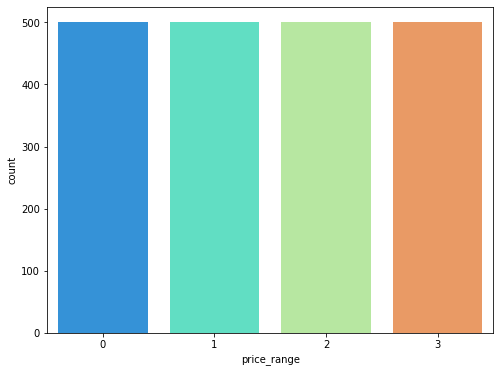

In [44]:
plt.figure(figsize=(8,6))
sn.countplot(data=df,x="price_range",palette="rainbow")

### price_range is containing almost same number of all the categories , so dataset is balanced ,we don't have to perform the techniques like over sampling or SMOTETomek to balance the dataset.

In [45]:
# Now we will use distplot to observe the distribution of each column.

# Plotting Relation between ram and price_range

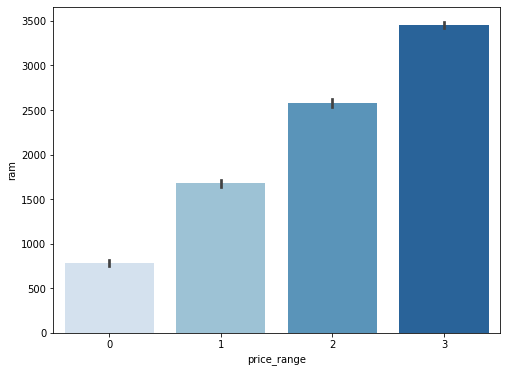

In [46]:
plt.figure(figsize=(8,6))
sn.barplot(data=df,x="price_range",y="ram",palette="Blues")

# Plotting Relation between battery_power and price_range

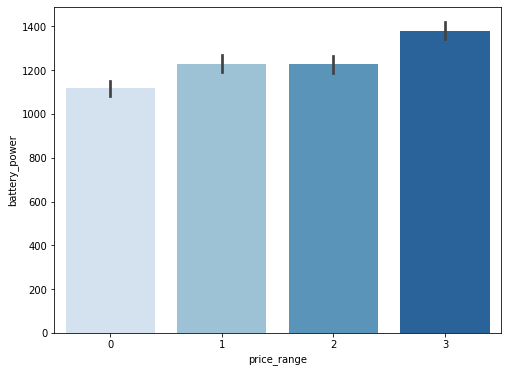

In [47]:
plt.figure(figsize=(8,6))
sn.barplot(data=df,x="price_range",y="battery_power",palette="Blues")

# Plotting Relation between price_range &  3G and 4G 

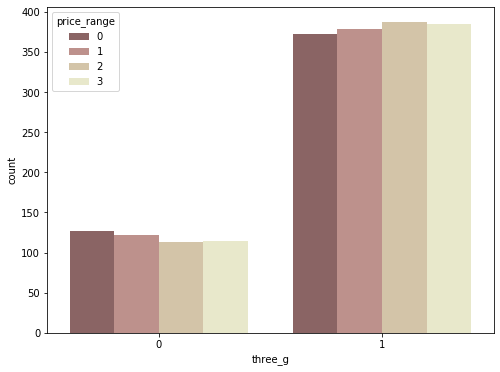

In [48]:
plt.figure(figsize=(8,6))
sn.countplot(data=df,x="three_g",hue="price_range",palette="pink")

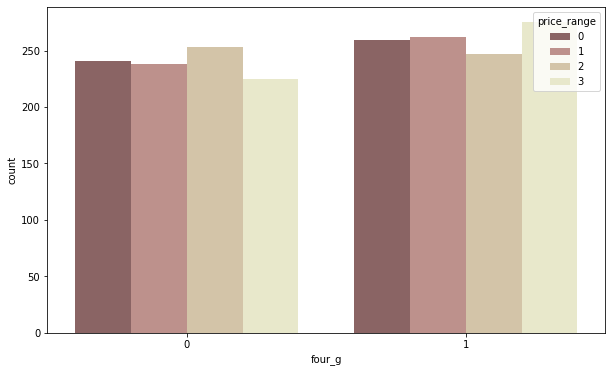

In [49]:
plt.figure(figsize=(10,6))
sn.countplot(data=df,x="four_g",hue="price_range",palette="pink")

# Plotting the Relation of px_height and px_width with price_range

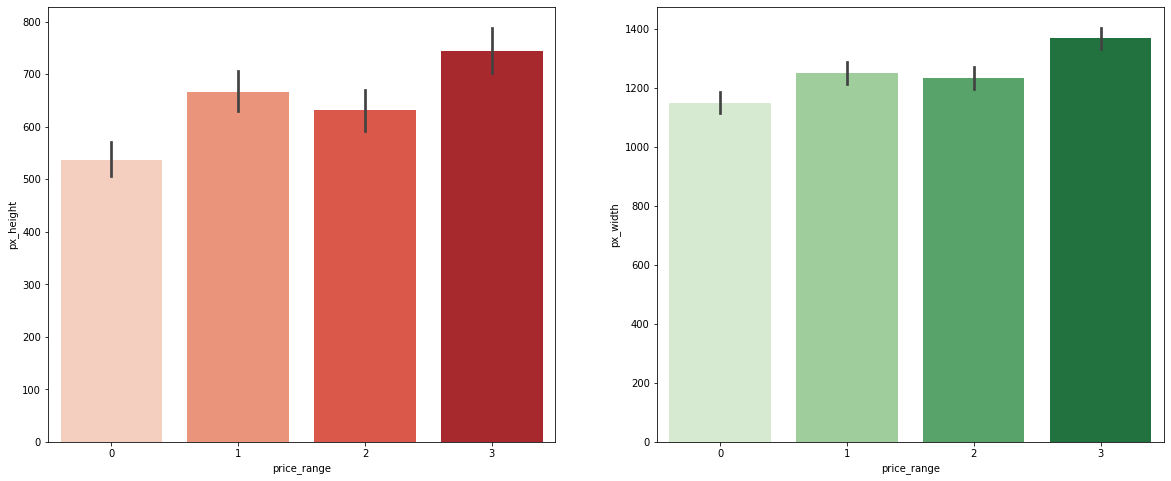

In [50]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sn.barplot(data=df,x="price_range",y="px_height",palette="Reds")
plt.subplot(122)
sn.barplot(data=df,x="price_range",y="px_width",palette="Greens")

## Dist Plot to see the distribution of each feature

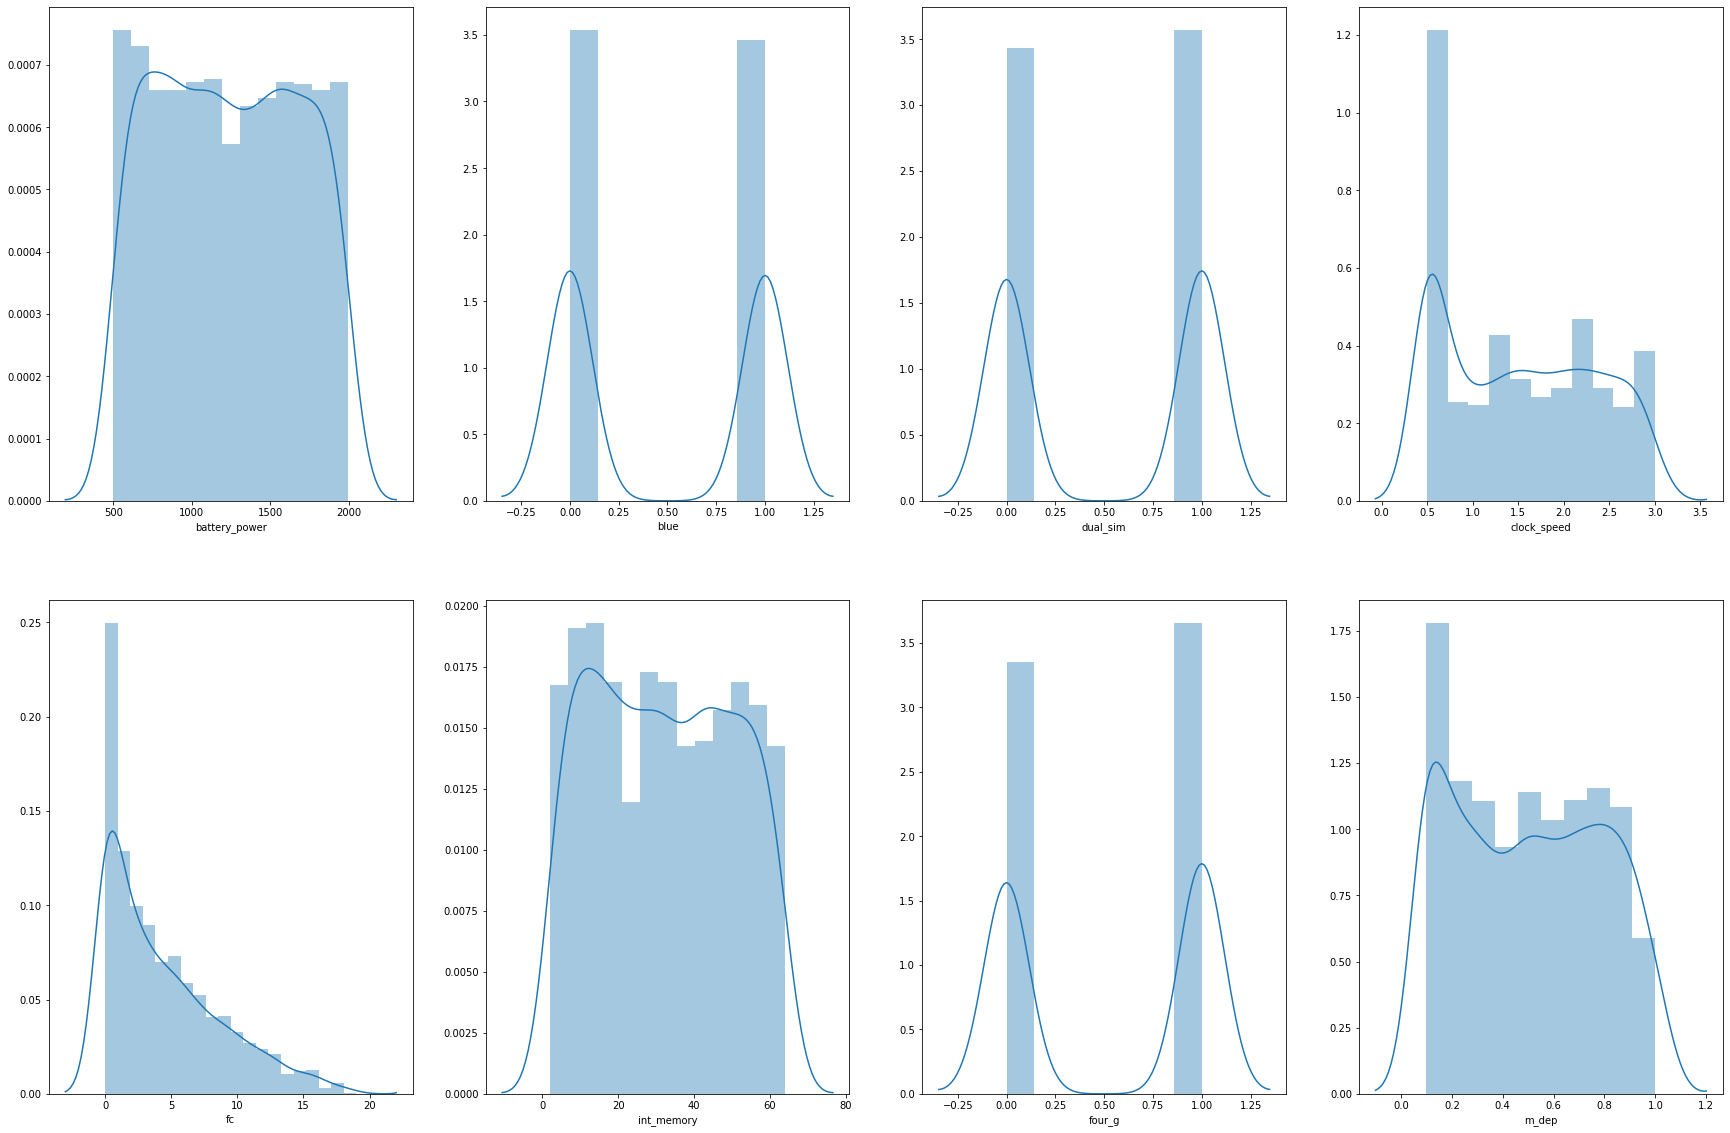

In [51]:
# Distplot shows the distribution of each column and in the y axis it shows the pdf .

plt.figure(figsize=(30,20))
plt.subplot(241)
sn.distplot(df["battery_power"])
plt.subplot(242)
sn.distplot(df["blue"])
plt.subplot(243)
sn.distplot(df["dual_sim"])
plt.subplot(244)
sn.distplot(df["clock_speed"])
plt.subplot(245)
sn.distplot(df["fc"])
plt.subplot(246)
sn.distplot(df["int_memory"])
plt.subplot(247)
sn.distplot(df["four_g"])
plt.subplot(248)
sn.distplot(df["m_dep"])


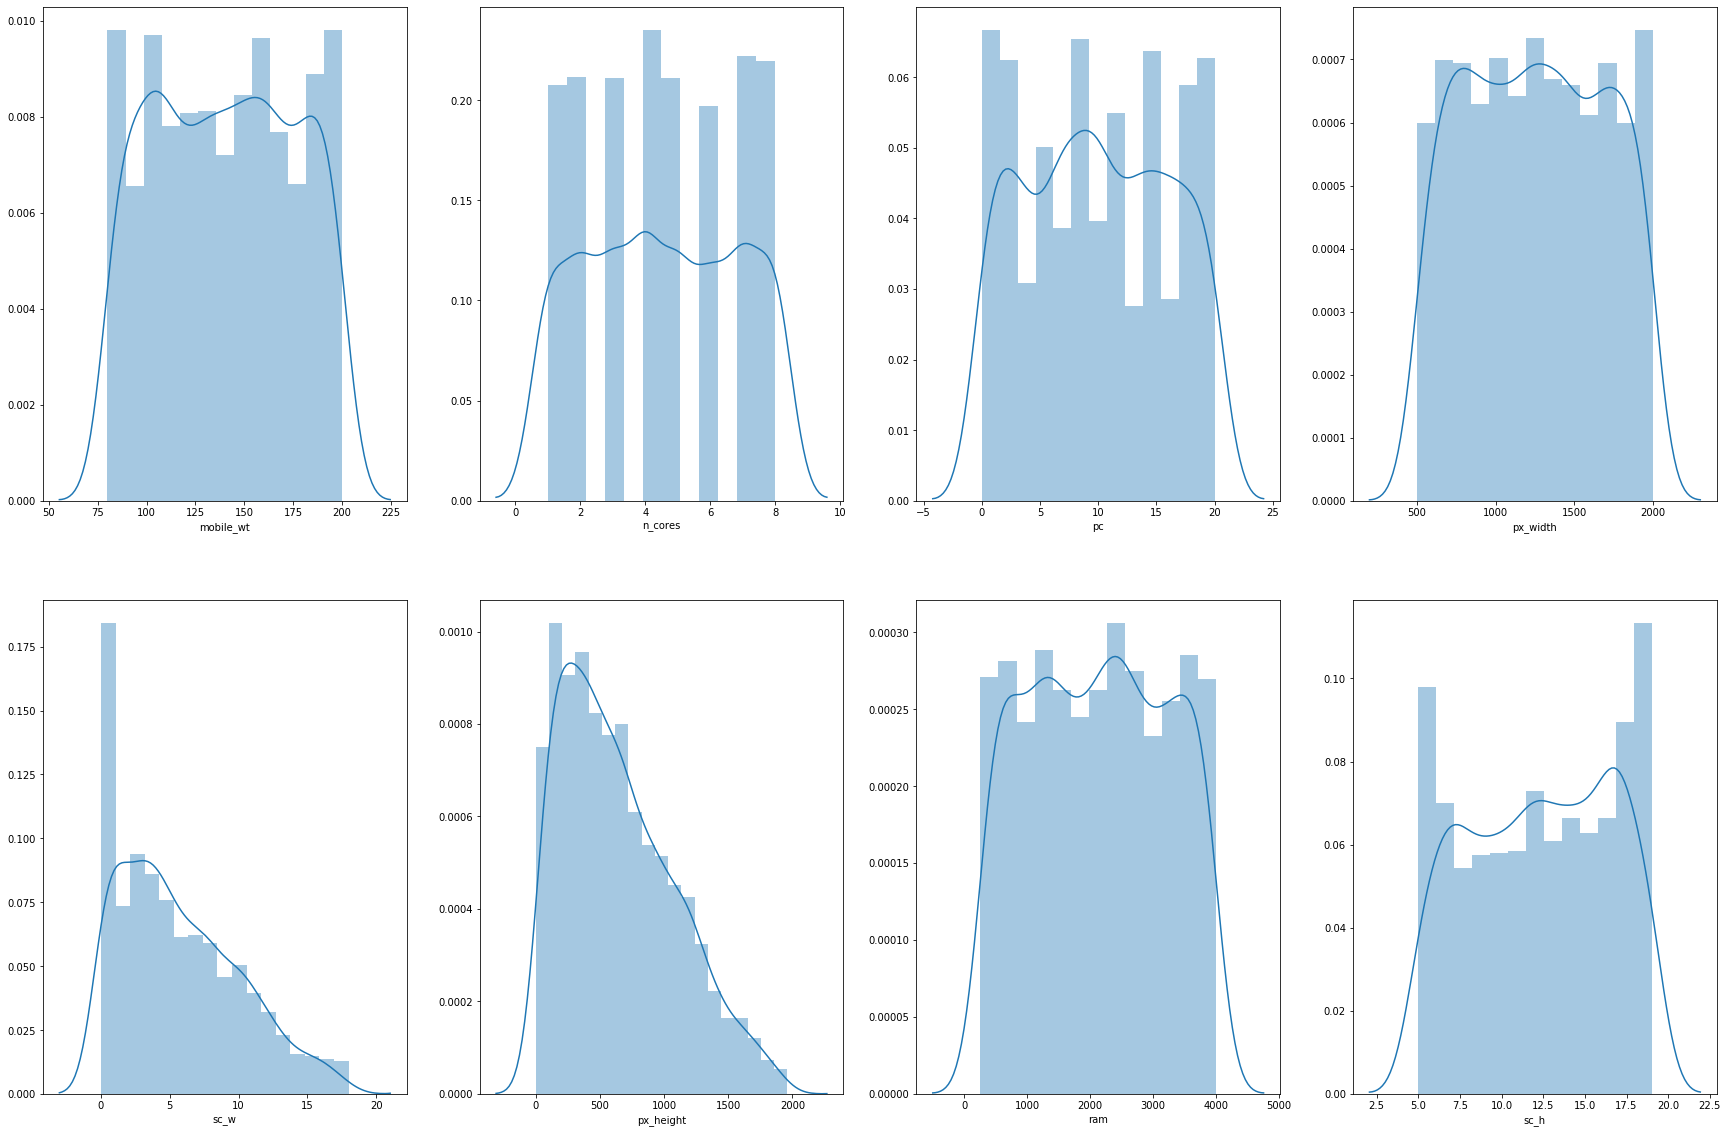

In [52]:
plt.figure(figsize=(30,20))
plt.subplot(241)
sn.distplot(df["mobile_wt"])
plt.subplot(242)
sn.distplot(df["n_cores"])
plt.subplot(243)
sn.distplot(df["pc"])
plt.subplot(244)
sn.distplot(df["px_width"])
plt.subplot(245)
sn.distplot(df["sc_w"])
plt.subplot(246)
sn.distplot(df["px_height"])
plt.subplot(247)
sn.distplot(df["ram"])
plt.subplot(248)
sn.distplot(df["sc_h"])


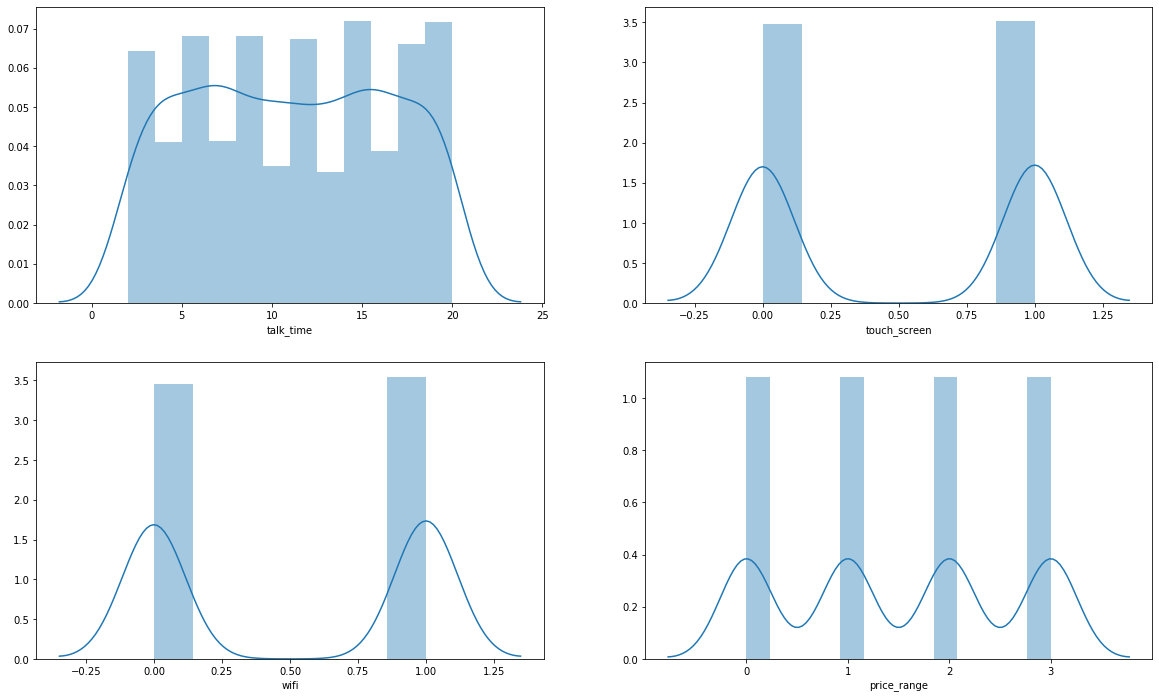

In [53]:
plt.figure(figsize=(20,12))
plt.subplot(221)
sn.distplot(df["talk_time"])
plt.subplot(222)
sn.distplot(df["touch_screen"])
plt.subplot(223)
sn.distplot(df["wifi"])
plt.subplot(224)
sn.distplot(df["price_range"])


### Here we have observed that none of the feature is following Normal Distribution.

## Pie Chart

In [54]:
## Now we will use Pie chart to examine exactly what percentage of the different categories is present in each feature.

In [55]:
## Finding all the columns which are having only two categories and then we will apply pie chart to each column.

features_list=[]
for feature in df.columns:
    if df[feature].nunique()==2:
        features_list.append(feature)
features_list 

# features_list is containing all the columns with only two categories

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

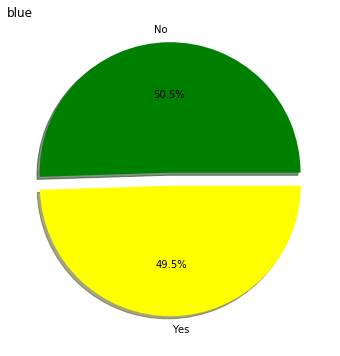

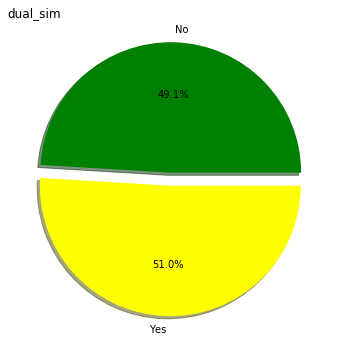

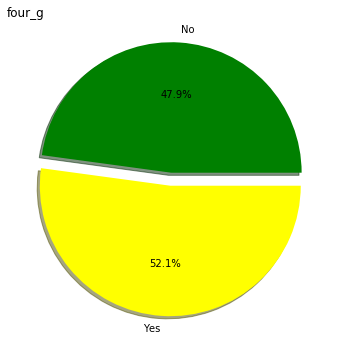

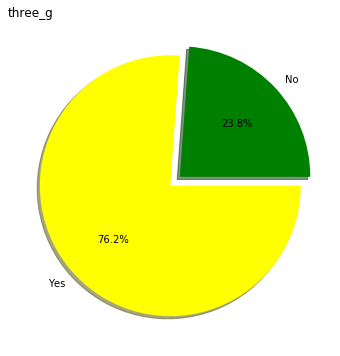

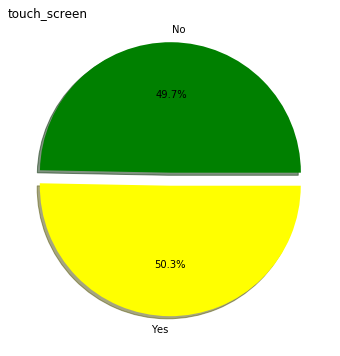

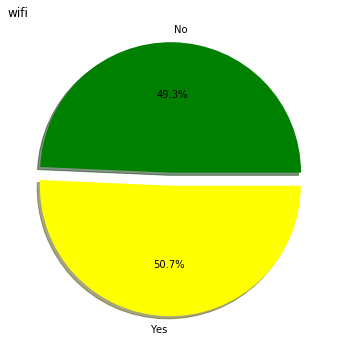

In [56]:
# Here we are applying Pie chart to each column and in the top left of each pie chart we have the name of the column.

for feature in features_list:
    labels=["No","Yes"]
    plt.figure(figsize=(12,6))
    plt.title(feature,loc="left")
    plt.pie([df[feature].value_counts()[0],df[feature].value_counts()[1]],explode=[0.1,0],shadow=True,colors=["green","yellow"],labels=labels,autopct="%.1f%%") 
    

In [57]:
## Creating another data frame and a column which will be mapped w.r.t. dict for n_cores
## And applying Pie Chart .

dict={1:"Single-Core",2:"Dual-Core",3:"Triple-Core",4:"Quad-Core",5:"Penta-Core",6:"Hexa-Core",7:"Hepta-Core",8:"Octa-Core"}
data=df.copy()
data["Cores"]=data["n_cores"].map(dict)

px.pie(data_frame=data,names="Cores",title="Comparison of devices sold based on different cores",hole=0.1)

### From the above Pie Chart we can observe that the devices with Quad-Core Processors have been the sold the most.

## Histogram

In [58]:
# blue column

px.histogram(data_frame=df,x="blue",title="Comparison of devices sold having bluetooth or not",color="price_range",nbins=10)

In [59]:
# wifi column

px.histogram(data_frame=df,x="wifi",title="Comparison of devices sold having wifi or not",color="price_range",nbins=10)

In [60]:
# dual_sim column

px.histogram(data_frame=df,x="dual_sim",title="Comparison of devices sold having dual_sim or not",color="price_range",nbins=10)

In [61]:
# three_g column

px.histogram(data_frame=df,x="three_g",title="Comparison of devices sold having three_g or not",color="price_range",nbins=10)

In [62]:
# four_g column

px.histogram(data_frame=df,x="four_g",title="Comparison of devices sold having four_g or not",color="price_range",nbins=10)

In [63]:
# touch_screen column

px.histogram(data_frame=df,x="touch_screen",title="Comparison of devices sold having touch_screen or not",color="price_range",nbins=10)

In [64]:
# Cores column

px.histogram(data_frame=data,x="Cores",title="Comparison of the devices sold based on the different cores",color="price_range")

### We can conclude that the devices with Quad-Core Processors have the highest sales.

## Outliers

In [65]:
# Finding whether outliers are present in our features or not

for feature in df.columns:
    pl=px.box(data_frame=df,y=feature)
    pl.show()

### We can clearly see that other than only fc column has very few outliers

# 3.Life cycle: Feature Engineering

### We don't have any missing values,Temporal variables (Year Variables )and categorical (text) variables in our dataset . So we will be only performing Feature Scaling .

## --> Feature Scaling 

### MinMaxScaler --> In this technique the value of each feature is scaled down between 0 to 1
formula=(X-X.min)/(X.max-X.min)

In [31]:
from sklearn.preprocessing import MinMaxScaler
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [32]:
# Except price_range column we are applying StandardScaler to all the features.

scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df.iloc[:,:-1])

In [33]:
## Making the DataFrame from the scaled features with same feature names.

df_scaled=pd.DataFrame(data=df_scaled,columns=df.columns[:-1])
df_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [34]:
# Getting the additional information about df_scaled : (mean, std, min, 25 percentile, 50 percentile ,75 percentile , max) values from each feature

df_scaled.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,0.495825,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,0.303216,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,0.250000,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,0.500000,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,0.750000,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing the data into dependent and independent set

In [35]:
X=df.iloc[:,:-1]
Y=df["price_range"]

# 4. Life cycle: Feature Selection.

## 1. Removing Low Variance Features

In [36]:
from sklearn.feature_selection import VarianceThreshold

In [37]:
var_thres=VarianceThreshold(threshold=0.3)
var_thres.fit(df)
var_thres.get_support()

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True])

In [38]:
df.columns[var_thres.get_support()]

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
       'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'price_range'],
      dtype='object')

In [39]:
removed_features=[column for column in df.columns if column  not in df.columns[var_thres.get_support()]]
removed_features

# removed features contains the list of features that we will remove while model building

['blue', 'dual_sim', 'four_g', 'm_dep', 'three_g', 'touch_screen', 'wifi']

## 2. Removing Features based on High Correlation

In [40]:
corr=df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


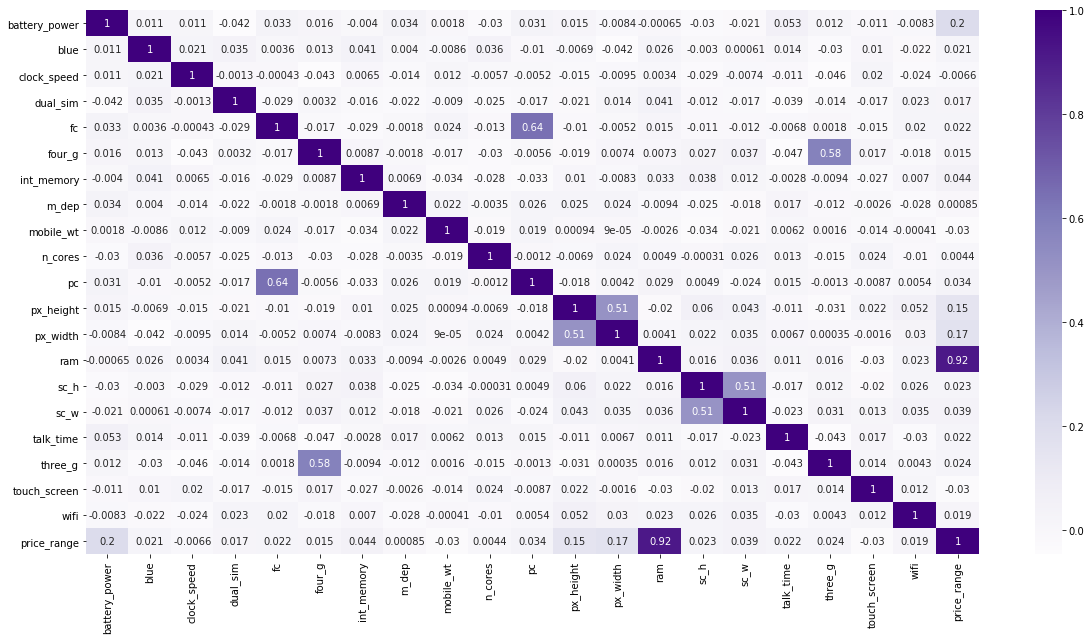

In [41]:
plt.figure(figsize=(20,10))
sn.heatmap(corr,cmap="Purples",annot=True)

In [42]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
col_corr=correlation(df.iloc[:,:-1],0.5)
col_corr

## col_corr contains the list of features that we will remove while model building

{'pc', 'px_width', 'sc_w', 'three_g'}

### So with correlation we got these four independent features that we will be removing while building our model

## 3.Mutual information for classification 

In [44]:
from sklearn.feature_selection import mutual_info_classif

In [45]:
mu=mutual_info_classif(X,Y)
mu=pd.Series(mu,index=X.columns)
mu.sort_values(ascending=False)

## Below we have the Series of features in descending order of the dependencies on output variable

ram              0.846159
sc_h             0.034876
battery_power    0.029674
px_width         0.028577
px_height        0.026360
dual_sim         0.026255
touch_screen     0.017765
mobile_wt        0.015162
sc_w             0.013863
four_g           0.013461
int_memory       0.007995
fc               0.007108
blue             0.002234
three_g          0.001873
talk_time        0.000000
pc               0.000000
n_cores          0.000000
m_dep            0.000000
clock_speed      0.000000
wifi             0.000000
dtype: float64

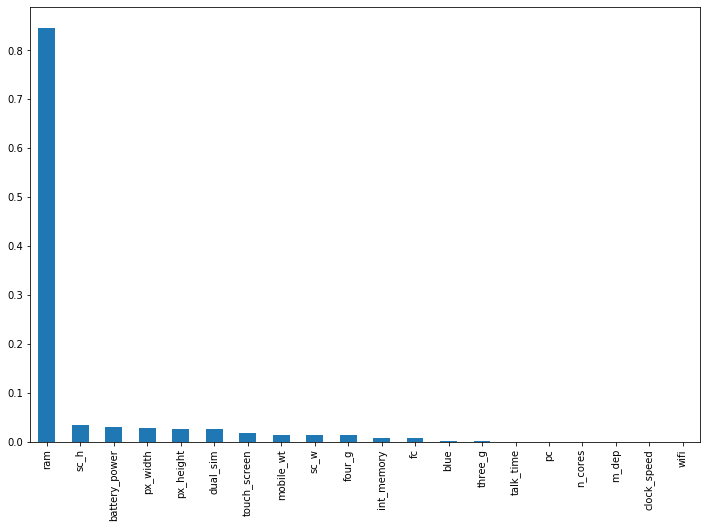

In [46]:
plt.figure(figsize=(12,8))
mu.sort_values(ascending=False).plot.bar()

In [47]:
## mutual_info contains the Features that this technique will give

mutual_info=list(mu.sort_values(ascending=False).index[:12])

m=list(mu.sort_values(ascending=False).index[12:])
m
## m contains the list of features that we will remove while building model

['blue',
 'three_g',
 'talk_time',
 'pc',
 'n_cores',
 'm_dep',
 'clock_speed',
 'wifi']

## 4. Chi2 Test

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [49]:
## Chi2 Test returns two values: 1. Scores and 2. p-values
## The lesser the p_vales , more important the feature is and the higher the scores, more important the feature is.

scores,p_values=chi2(X,Y)

In [50]:
p_value=pd.Series(p_values,index=X.columns)
p_value.sort_values()

## We have sorted the features with p_values in ascending order(i.e The important features are having lowest p_values)

battery_power    0.000000e+00
ram              0.000000e+00
px_width         0.000000e+00
px_height        0.000000e+00
mobile_wt        1.140850e-20
int_memory       2.371978e-19
sc_w             9.037659e-04
talk_time        4.152292e-03
fc               1.745143e-02
sc_h             2.214014e-02
pc               2.691680e-02
n_cores          2.802156e-02
touch_screen     5.873935e-01
four_g           6.773005e-01
m_dep            8.623774e-01
blue             8.677263e-01
clock_speed      8.852762e-01
dual_sim         8.892979e-01
wifi             9.356422e-01
three_g          9.547485e-01
dtype: float64

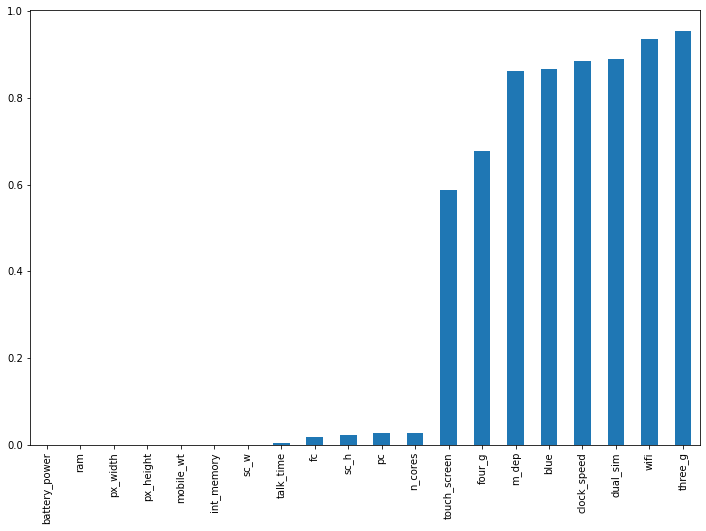

In [51]:
plt.figure(figsize=(12,8))
p_value.sort_values().plot.bar()

In [52]:
p=list(p_value.sort_values().index[12:])
p

## p contains the list of features that we will remove while building model.(in the right from m_dep to three_g)

['touch_screen',
 'four_g',
 'm_dep',
 'blue',
 'clock_speed',
 'dual_sim',
 'wifi',
 'three_g']

## 5. Feature Importance

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

In [54]:
et=ExtraTreesClassifier()
et.fit(X,Y)

ExtraTreesClassifier()

In [65]:
ser=pd.Series(et.feature_importances_,index=X.columns)

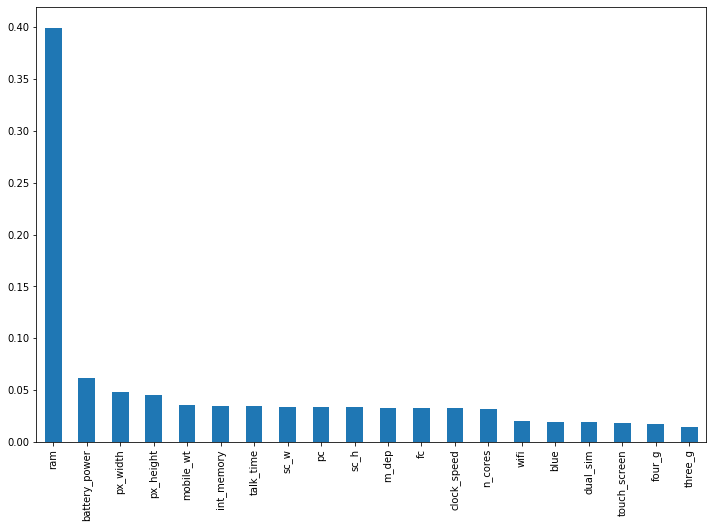

In [66]:
plt.figure(figsize=(12,8))
ser.sort_values(ascending=False).plot.bar()

In [67]:
s=list(ser.sort_values(ascending=False).index[14:])
s

## s contains the list of features that we will remove while building model.

['wifi', 'blue', 'dual_sim', 'touch_screen', 'four_g', 'three_g']

### Making a list of all the features that  5 different feature selection techniques have given to remove. 

In [68]:
## List of the features from 5 feature selection techniques that we will remove at the time of model building.

remove_feature_list=[removed_features,col_corr,m,p,s]

In [69]:
## Creating the list of the names of Feature selection Techniques in the same order as we have applied them.

feature_selection_tech=["Variance","Correlation","mutual_info_classif","chi2","Feature Importance"]

# 5. Model Building

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

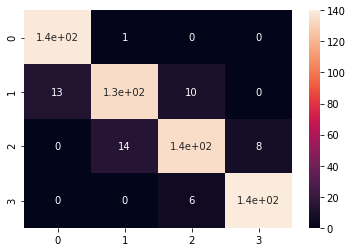

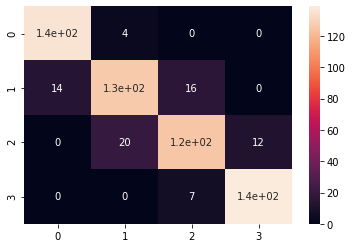

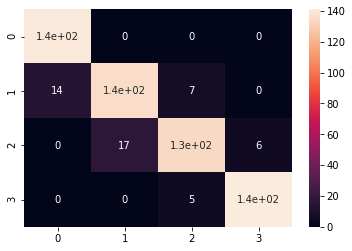

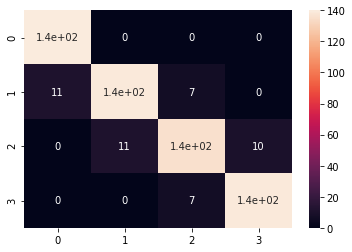

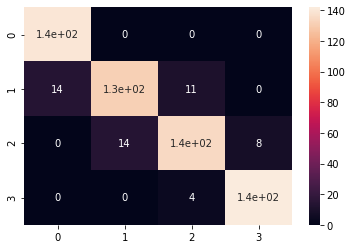

In [71]:
## Here we are creating 5 different models and in each iteration we are removing the list of features from remove_feature_list
## and we will at last compare the accuracies of all these models and will selkect the one with best accuracy.
## Here we will pass our scaled dataframe (i.e. df_scaled ) as Logistic Regression involves Gradient Descent concept ,so scaled 
## features will give us good accuracy
from sklearn.linear_model import LogisticRegression

accuracy=[]
from sklearn.model_selection import train_test_split
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(df_scaled.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    lr_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,lr_pred)
    accuracy.append(acc)
    cn=confusion_matrix(Y_test,lr_pred)
    sn.heatmap(cn,annot=True)
    plt.show()
                     

Text(0.5, 1.0, 'Logistic Regression')

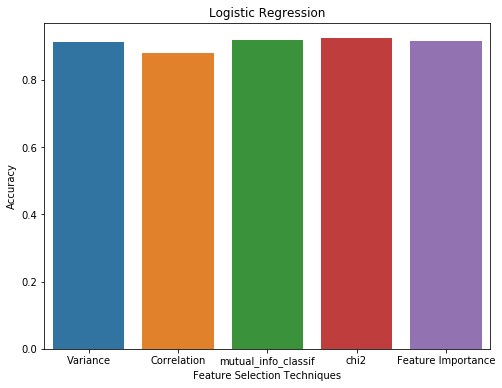

In [72]:
plt.figure(figsize=(8,6))
sn.barplot(x=feature_selection_tech,y=accuracy)
plt.xlabel("Feature Selection Techniques")
plt.ylabel("Accuracy")
plt.title("Logistic Regression")

## barchart shows the accuracies we got from each of the feature selection techniques.

In [73]:
accuracy

[0.9133333333333333,
 0.8783333333333333,
 0.9183333333333333,
 0.9233333333333333,
 0.915]

In [74]:
## Getting the highest accuracy value and the feature selection technique that gave us the maximum accuracy.

print(" By using Logistic Regression we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using Logistic Regression we have got maximum Accuracy of 92.33333333333333 % by using chi2 Feature Selection Technique.


## Logistic Regression without applying any Feature Selection Techniques

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(df_scaled,Y,test_size=0.3,random_state=10)
n_lr=LogisticRegression()
n_lr.fit(X_train,Y_train)
n_lr_pred=n_lr.predict(X_test)
accuracy_score(Y_test,n_lr_pred)

0.9116666666666666

## Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

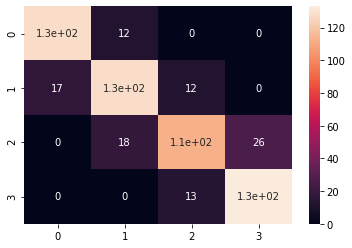

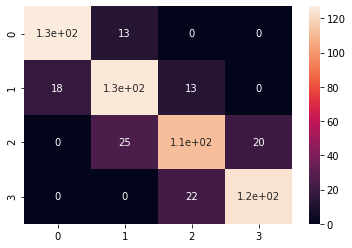

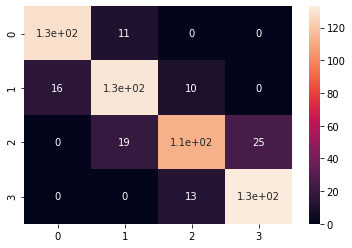

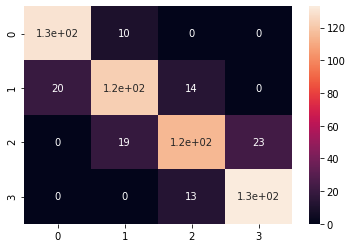

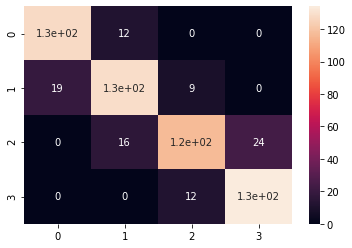

In [77]:
## Here we are passing our original input features(i.e. X ) as Feature Scaling has no effect on increasing accuracy of 
## Decision Tree

accuracy=[]
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(X.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,Y_train)
    dt_pred=dt.predict(X_test)
    acc=accuracy_score(Y_test,dt_pred)
    accuracy.append(acc)
    cn=confusion_matrix(Y_test,dt_pred)
    sn.heatmap(cn,annot=True)
    plt.show()

Text(0.5, 1.0, 'Decision Tree')

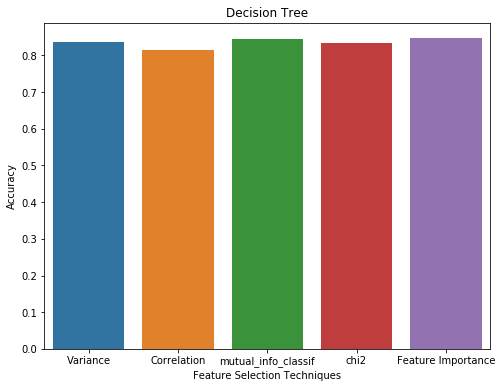

In [78]:
plt.figure(figsize=(8,6))
sn.barplot(x=feature_selection_tech,y=accuracy)
plt.xlabel("Feature Selection Techniques")
plt.ylabel("Accuracy")
plt.title("Decision Tree")

## barchart shows the accuracies we got from each of the feature selection techniques.

In [79]:
accuracy

[0.8366666666666667, 0.815, 0.8433333333333334, 0.835, 0.8466666666666667]

In [80]:
## Getting the highest accuracy value and the feature selection technique that gave us the maximum accuracy.

print(" By using Decision Tree we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using Decision Tree we have got maximum Accuracy of 84.66666666666667 % by using Feature Importance Feature Selection Technique.


## Decision Tree Classifier without applying any Feature Selection Techniques

In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
n_dt=DecisionTreeClassifier()
n_dt.fit(X_train,Y_train)
n_dt_pred=n_dt.predict(X_test)
accuracy_score(Y_test,n_dt_pred)

0.8433333333333334

## SVM 

In [82]:
from sklearn.svm import SVC

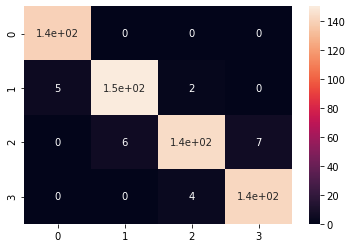

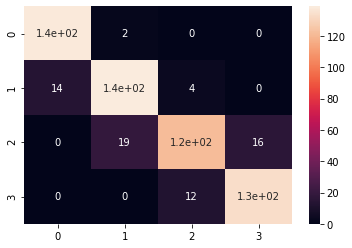

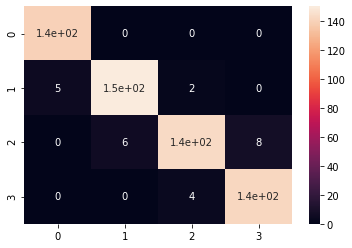

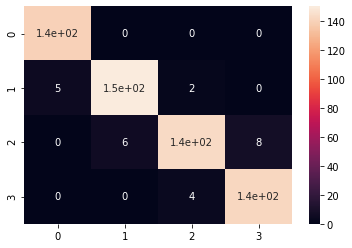

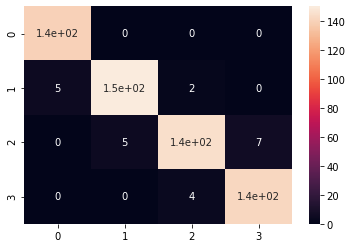

In [83]:
accuracy=[]
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(X.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    Svm=SVC(kernel="poly")
    Svm.fit(X_train,Y_train)
    Svm_pred=Svm.predict(X_test)
    acc=accuracy_score(Y_test,Svm_pred)
    accuracy.append(acc)
    cn=confusion_matrix(Y_test,Svm_pred)
    sn.heatmap(cn,annot=True)
    plt.show()

Text(0.5, 1.0, 'SVM')

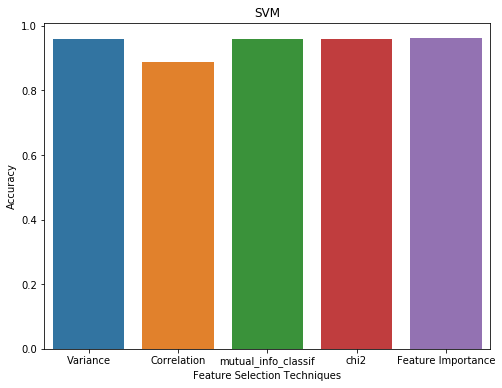

In [84]:
plt.figure(figsize=(8,6))
sn.barplot(x=feature_selection_tech,y=accuracy)
plt.xlabel("Feature Selection Techniques")
plt.ylabel("Accuracy")
plt.title("SVM")

## barchart shows the accuracies we got from each of the feature selection techniques.

In [85]:
accuracy

[0.96,
 0.8883333333333333,
 0.9583333333333334,
 0.9583333333333334,
 0.9616666666666667]

In [86]:
## Getting the highest accuracy value and the feature selection technique that gave us the maximum accuracy.

print(" By using SVM we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using SVM we have got maximum Accuracy of 96.16666666666667 % by using Feature Importance Feature Selection Technique.


## SVM Classifier without applying any Feature selection Techniques

In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
n_Svm=SVC(kernel="poly")
n_Svm.fit(X_train,Y_train)
n_Svm_pred=n_Svm.predict(X_test)
accuracy_score(Y_test,n_Svm_pred)

0.95

## KNN

In [88]:
## Train test split

In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

### Finding out the optimal value of K

In [91]:
error_rate=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred!=Y_test))

Text(0, 0.5, 'Error Rate')

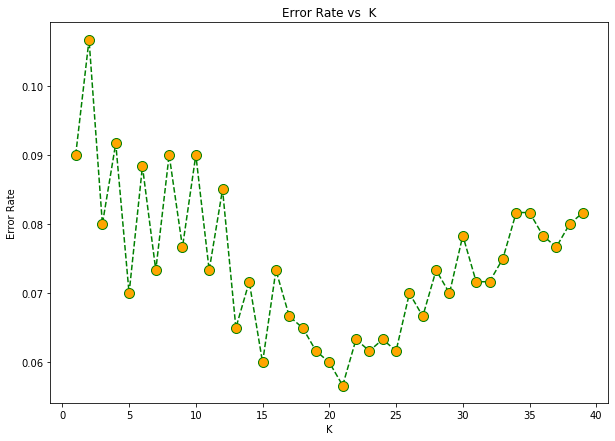

In [92]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error_rate,marker="o",color="green",markerfacecolor="orange" ,linestyle="dashed",markersize="10")
plt.title("Error Rate vs  K")
plt.xlabel("K")
plt.ylabel("Error Rate")

## Now we have got the optimal value of K = 21 , now we will apply KNN by keeping K=21 

In [93]:
from sklearn.neighbors import KNeighborsClassifier

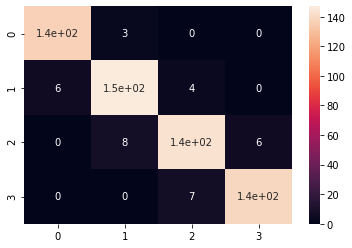

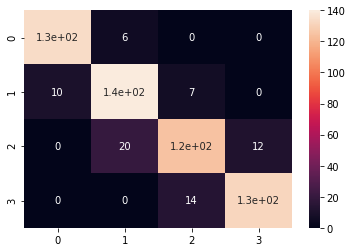

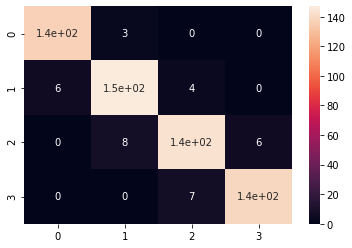

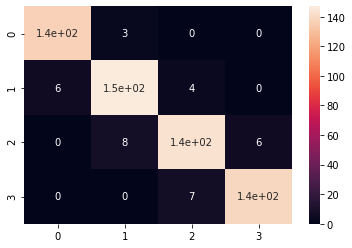

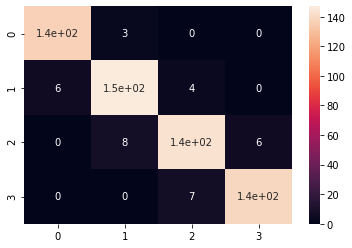

In [94]:
accuracy=[]
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(X.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    Knn=KNeighborsClassifier(n_neighbors=21)
    Knn.fit(X_train,Y_train)
    Knn_pred=Knn.predict(X_test)
    acc=accuracy_score(Y_test,Knn_pred)
    accuracy.append(acc)
    cn=confusion_matrix(Y_test,Knn_pred)
    sn.heatmap(cn,annot=True)
    plt.show()

Text(0.5, 1.0, 'KNN')

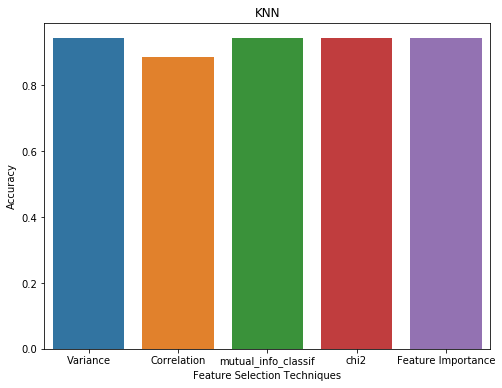

In [95]:
plt.figure(figsize=(8,6))
sn.barplot(x=feature_selection_tech,y=accuracy)
plt.xlabel("Feature Selection Techniques")
plt.ylabel("Accuracy")
plt.title("KNN")

## barchart shows the accuracies we got from each of the feature selection techniques.

In [96]:
accuracy

[0.9433333333333334,
 0.885,
 0.9433333333333334,
 0.9433333333333334,
 0.9433333333333334]

In [97]:
## Getting the highest accuracy value and the feature selection technique that gave us the maximum accuracy.

print(" By using KNN we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using KNN we have got maximum Accuracy of 94.33333333333334 % by using Variance Feature Selection Technique.


## KNN Classifier without applying any Feature selection Techniques

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
n_Knn=KNeighborsClassifier(n_neighbors=21)
n_Knn.fit(X_train,Y_train)
n_Knn_pred=n_Knn.predict(X_test)
accuracy_score(Y_test,n_Knn_pred)

0.9433333333333334

## Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB

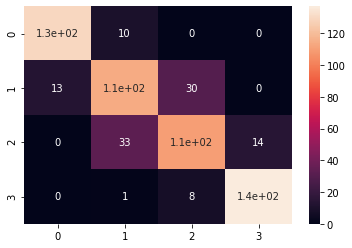

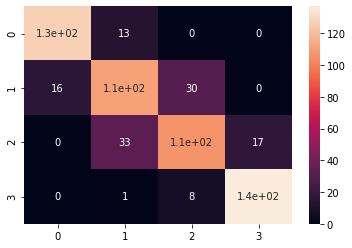

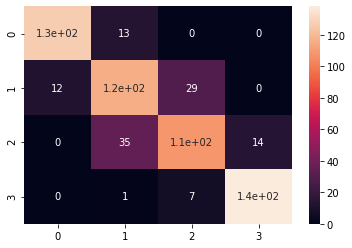

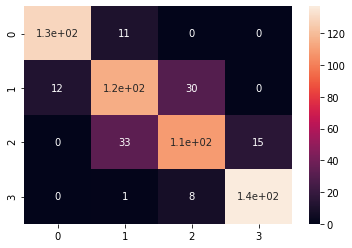

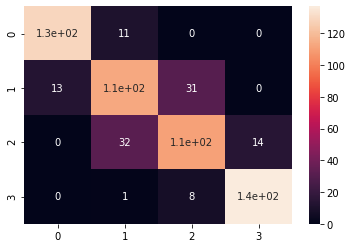

In [100]:
accuracy=[]
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(X.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    nb=GaussianNB()
    nb.fit(X_train,Y_train)
    nb_pred=nb.predict(X_test)
    acc=accuracy_score(Y_test,nb_pred)
    accuracy.append(acc)
    cn=confusion_matrix(Y_test,nb_pred)
    sn.heatmap(cn,annot=True)
    plt.show()

Text(0.5, 1.0, 'Naive Bayes')

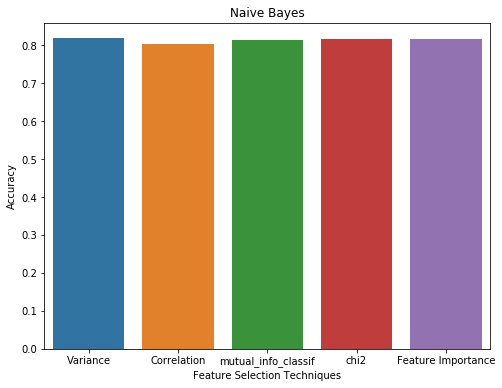

In [101]:
plt.figure(figsize=(8,6))
sn.barplot(x=feature_selection_tech,y=accuracy)
plt.xlabel("Feature Selection Techniques")
plt.ylabel("Accuracy")
plt.title("Naive Bayes")

## barchart shows the accuracies we got from each of the feature selection techniques.

In [102]:
accuracy

[0.8183333333333334,
 0.8033333333333333,
 0.815,
 0.8166666666666667,
 0.8166666666666667]

In [103]:
## Getting the highest accuracy value and the feature selection technique that gave us the maximum accuracy.

print(" By using Naive Bayes we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using Naive Bayes we have got maximum Accuracy of 81.83333333333334 % by using Variance Feature Selection Technique.


## Naive Bayes Classifier without applying any Feature selection Techniques

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
g_nb=GaussianNB()
g_nb.fit(X_train,Y_train)
g_nb_pred=g_nb.predict(X_test)
accuracy_score(Y_test,g_nb_pred)

0.8183333333333334

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

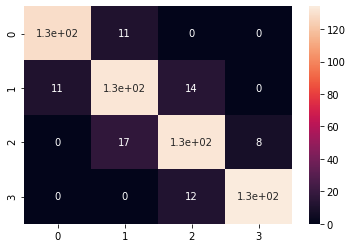

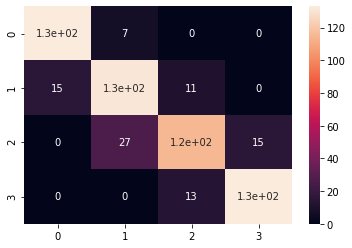

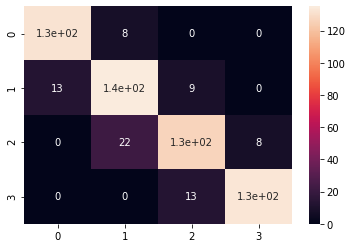

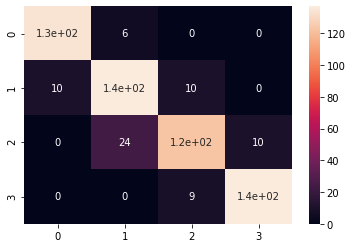

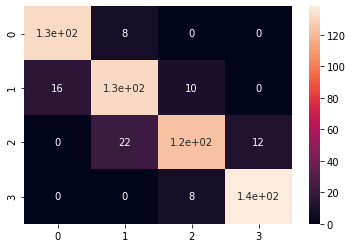

In [106]:
accuracy=[]
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(X.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    rf=RandomForestClassifier()
    rf.fit(X_train,Y_train)
    rf_pred=rf.predict(X_test)
    acc=accuracy_score(Y_test,rf_pred)
    accuracy.append(acc)
    cn=confusion_matrix(Y_test,rf_pred)
    sn.heatmap(cn,annot=True)
    plt.show()

Text(0.5, 1.0, 'Random Forest Classifier')

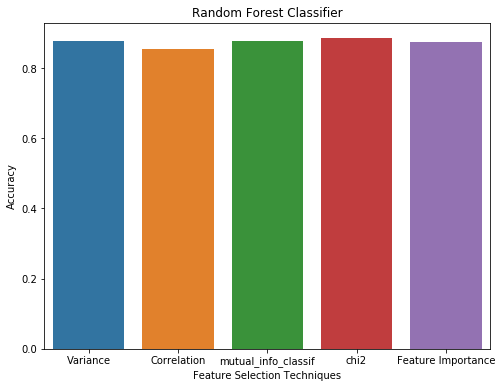

In [107]:
plt.figure(figsize=(8,6))
sn.barplot(x=feature_selection_tech,y=accuracy)
plt.xlabel("Feature Selection Techniques")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier")

## barchart shows the accuracies we got from each of the feature selection techniques.

In [108]:
accuracy

[0.8783333333333333,
 0.8533333333333334,
 0.8783333333333333,
 0.885,
 0.8733333333333333]

In [109]:
## Getting the highest accuracy value and the feature selection technique that gave us the maximum accuracy.

print(" By using Random Forest Classifier we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using Random Forest Classifier we have got maximum Accuracy of 88.5 % by using chi2 Feature Selection Technique.


## Random Forest Classifier without applying Feature selection Techniques 

In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
ran=RandomForestClassifier(random_state=20)
ran.fit(X_train,Y_train)
ran_pred=ran.predict(X_test)
confusion_matrix(Y_test,ran_pred)
accuracy_score(Y_test,ran_pred)

0.895

## We are getting higher accuracy for Random Forest Classifier without using any Feature Selection Techniques

## Comparing the accuracies of all the models 

In [111]:
data={"Algorithm":["Logistic Regression","Decision Tree","SVM","KNN","Naive Bayes","Random Forest"],"Accuracy":[92 ,85.5,96.16666666666667,94.33333333333334,81.83333333333334,89.5]}
new_df=pd.DataFrame(data,index=None)
new_df

,Algorithm,Accuracy
0,Logistic Regression,92.000000
1,Decision Tree,85.500000
2,SVM,96.166667
3,KNN,94.333333
4,Naive Bayes,81.833333
5,Random Forest,89.500000


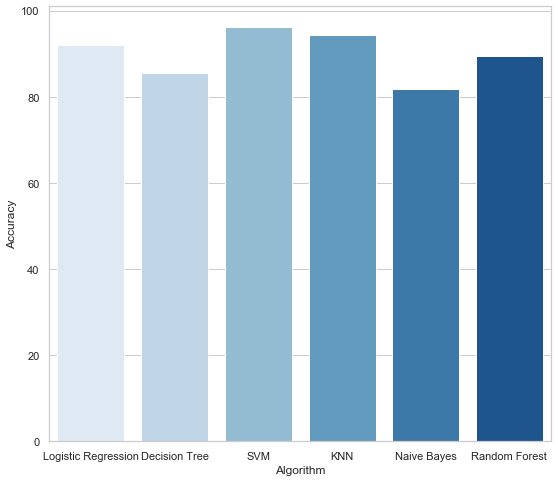

In [112]:
sn.set(style="whitegrid")
plt.figure(figsize=(9,8))
sn.barplot(data=new_df,x="Algorithm",y="Accuracy",palette="Blues")

### We have got maximum accuracy for Logistic Regression , SVM and KNN.
### Now we will apply Hyperparametric tuning to all these models to increaes their accuracies further.

# 6. Hyper Parametric Tuning Using Randomized Search CV

In [113]:
## Importing necessary libraries for Randomized Search CV and KFold Cross Validation

from sklearn.model_selection import RandomizedSearchCV,KFold,cross_val_score,train_test_split

In [114]:
## Hyperparametric Tuning For Logistic Regression

lr=LogisticRegression(random_state=1)
parameters_for_lr=[{"penalty":['l1','l2'],"C":range(1,50,4),"random_state":range(0,50,5),"multi_class" : ['auto', 'ovr', 'multinomial']}]
random_search=RandomizedSearchCV(estimator=lr,
                  param_distributions=parameters_for_lr,
                  scoring="accuracy",
                  n_jobs=-1,
                  error_score=0,
                  cv=KFold(n_splits=10))

In [115]:
# Performing Train Test Split with scaled features

X_train,X_test,Y_train,Y_test=train_test_split(df_scaled,Y,test_size=0.3,random_state=2)

In [116]:
random_search.fit(X_train,Y_train)

C:\Users\Ram Baldotra\anaconda3\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=0, estimator=LogisticRegression(random_state=1),
                   n_jobs=-1,
                   param_distributions=[{'C': range(1, 50, 4),
                                         'multi_class': ['auto', 'ovr',
                                                         'multinomial'],
                                         'penalty': ['l1', 'l2'],
                                         'random_state': range(0, 50, 5)}],
                   scoring='accuracy')

In [117]:
random_search.best_score_

0.9635714285714284

In [118]:
random_search.best_params_

{'random_state': 15, 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 41}

In [119]:

accuracy=[]
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(df_scaled.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    lr_tuned=LogisticRegression(penalty="l2",multi_class="auto",C=45,random_state=25)
    lr_tuned.fit(X_train,Y_train)
    lr_tuned_pred=lr_tuned.predict(X_test)
    acc=accuracy_score(Y_test,lr_tuned_pred)
    accuracy.append(acc)

C:\Users\Ram Baldotra\anaconda3\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Ram Baldotra\anaconda3\conda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Ram Bal

In [120]:
accuracy

[0.9766666666666667, 0.9, 0.9783333333333334, 0.9783333333333334, 0.97]

In [121]:
print(" By using Hyperparametric Tuning on Logistic Regression we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using Hyperparametric Tuning on Logistic Regression we have got maximum Accuracy of 97.83333333333334 % by using mutual_info_classif Feature Selection Technique.


In [122]:
## Hyperparametric Tuning For SVM

Svm=SVC(random_state=1)
parameters_for_Svm=[{"C":range(1,50,4),"kernel":['linear','rbf','poly','sigmoid'],"gamma":[.1,.2,.3,.4,.5,.6,.7,.8,.9,1],"random_state":range(0,50,5)}]
random_search=RandomizedSearchCV(estimator=Svm,
                  param_distributions=parameters_for_Svm,
                  scoring="accuracy",
                  n_jobs=-1,
                  error_score=0,
                  cv=KFold(n_splits=10))

In [123]:
# Performing Train Test Split without scaled features

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [124]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=0, estimator=SVC(random_state=1), n_jobs=-1,
                   param_distributions=[{'C': range(1, 50, 4),
                                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                   0.7, 0.8, 0.9, 1],
                                         'kernel': ['linear', 'rbf', 'poly',
                                                    'sigmoid'],
                                         'random_state': range(0, 50, 5)}],
                   scoring='accuracy')

In [125]:
random_search.best_score_

0.9657142857142856

In [126]:
random_search.best_params_

{'random_state': 20, 'kernel': 'linear', 'gamma': 1, 'C': 5}

In [139]:

accuracy=[]
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(X.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    Svm_tuned=SVC(kernel="linear",gamma=1,C=5,random_state=20)
    Svm_tuned.fit(X_train,Y_train)
    Svm_tuned_pred=Svm_tuned.predict(X_test)
    acc=accuracy_score(Y_test,Svm_tuned_pred)
    accuracy.append(acc)

In [140]:
accuracy

[0.9766666666666667, 0.89, 0.975, 0.9766666666666667, 0.9716666666666667]

In [142]:
print(" By using Hypermetric Tuning on SVM we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using Hypermetric Tuning on SVM we have got maximum Accuracy of 97.66666666666667 % by using Variance Feature Selection Technique.


In [130]:
## Hyperparametric Tuning For KNN

Knn=KNeighborsClassifier()
parameters_for_Knn=[{"n_neighbors":range(5,50,5),"weights":['uniform','distance'],"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}]
random_search=RandomizedSearchCV(estimator=Knn,
                  param_distributions=parameters_for_Knn,
                  scoring="accuracy",
                  n_jobs=-1,
                  error_score=0,
                  cv=KFold(n_splits=15))

In [131]:
# Performing Train Test Split without scaled features

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

In [132]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
                   error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions=[{'algorithm': ['auto', 'ball_tree',
                                                       'kd_tree', 'brute'],
                                         'n_neighbors': range(5, 50, 5),
                                         'weights': ['uniform', 'distance']}],
                   scoring='accuracy')

In [133]:
random_search.best_score_

0.9328910241744831

In [134]:
random_search.best_params_

{'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'auto'}

In [135]:

accuracy=[]
for i in remove_feature_list:
    X_train,X_test,Y_train,Y_test=train_test_split(X.drop(i,axis="columns"),Y,test_size=0.3,random_state=10)
    Knn_tuned=KNeighborsClassifier(n_neighbors=15,algorithm="ball_tree",weights="distance")
    Knn_tuned.fit(X_train,Y_train)
    Knn_tuned_pred=Knn_tuned.predict(X_test)
    acc=accuracy_score(Y_test,Knn_tuned_pred)
    accuracy.append(acc)

In [136]:
accuracy

[0.9433333333333334,
 0.8816666666666667,
 0.9433333333333334,
 0.9433333333333334,
 0.9433333333333334]

In [137]:
print(" By using Hyperparametric Tuning on KNN we have got maximum Accuracy of {} % by using {} Feature Selection Technique.".format((max(accuracy)*100),feature_selection_tech[accuracy.index(max(accuracy))]))

 By using Hyperparametric Tuning on KNN we have got maximum Accuracy of 94.33333333333334 % by using Variance Feature Selection Technique.


### So by applying Hyperparametric Tuning, we have increased the accuracy of the following Algorithms
### 1. Logistic Regression from 92 % to 97.83333333333334 % 
### 2. SVM from 96.16666666666667 % to 97.66666666666667 %
### 3. KNN from 94.33333333333334 % to 94.33333333333334  % 

## There is no effect of Hyperparametric Tuning on KNN as the accuracy remains the same.

## From all the models that we have built, we have got the highest accuracy of 97.83333333333334 % from Logistic Regression by using mutual info classification Feature Selection technique and it has selected only 12 most important  features from all the features 

In [138]:
mutual_info

## mutual_info contains 12 features in the decreasing order of their importance

['ram',
 'sc_h',
 'battery_power',
 'px_width',
 'px_height',
 'dual_sim',
 'touch_screen',
 'mobile_wt',
 'sc_w',
 'four_g',
 'int_memory',
 'fc']

# For the given classification problem, Logistic Regression with the above hypertuned parameters and selected features works the best.